## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [1]:
import pandas as pd

In [2]:
import_path = r'.\chronic_kidney_disease_full.csv'
data = pd.read_csv(import_path)

In [3]:
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer:  
* pus cells (pc) and pus cell clumps (pcc) seem to be related.
* Presence of bacteria (ba) might be related to white blood cell count (wbcc).

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [4]:
data.shape

(400, 25)

In [5]:
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

Answer:

In [6]:
df_complete = data.dropna()

In [7]:
df_complete.shape

(158, 25)

There will be 158 rows left.  
1. Dropping all rows with missing values would mean less data to train our model on, which may cause it to underfit.
2. Furthermore, there is the assumption that the missing data is randomly distributed, which may not be true.

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer:
1. A person's sugar level may be dependant on whether the person ate before testing.
2. The definition of a good appetite varies from person to person.
3. There is no indication of the threshold or measurement by which a person is considered to have conditions like hypertension or anemia.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

Answer: I will just tell everyone that they have CKD.

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We optimized for recall.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: Wasted resources treating people who do not have CKD.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: I will tell everyone they do not have CKD.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We optimized for specificity.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: People who have CKD will be left untreated and die.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

1. Impute na values.

In [8]:
numerical = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

In [9]:
for num in numerical:
    m = data[num].mean()
    data[num] = data[num].fillna(m)

In [10]:
non_numerical = [x for x in data.columns if x not in numerical]

In [11]:
for num in non_numerical:
    m = data[num].value_counts().keys()[0]
    data[num] = data[num].fillna(m)

In [12]:
data.isnull().sum().sum()

0

Null value imputation confirmed.

2. Calculate correlations and plot heatmaps.

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
data['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [15]:
data['class'] = data['class'].map({'ckd':1, 'notckd': 0})

In [16]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,1


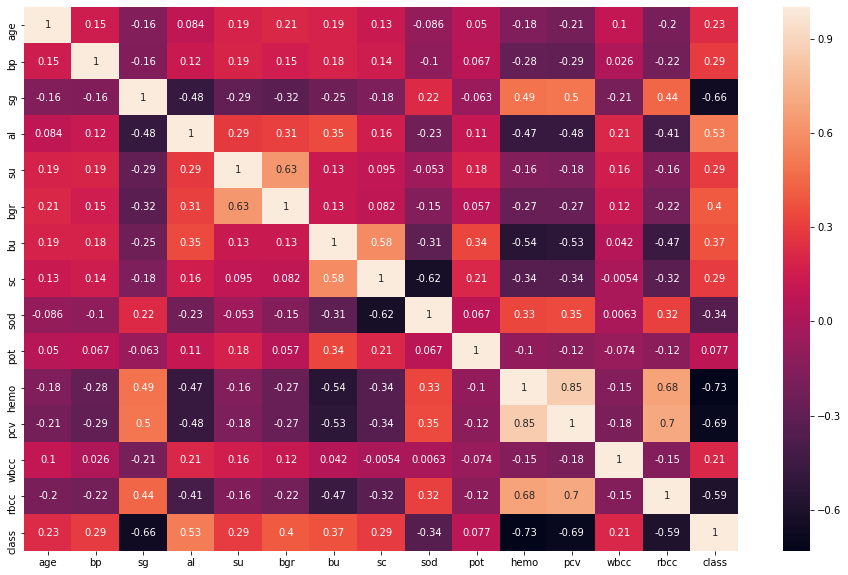

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sb.heatmap(data.corr(), annot=True, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [18]:
import numpy as np

In [19]:
def vif_feature_select(df, max_score=5.0, inplace=False, drop_list=False, _drops=None):
    '''
    Takes a DataFrame and returns it after recursively eliminating columns
    with the highest VIF scores until the remainder have a VIF scores of less
    than max_score.

    drop_list=True gets a list of features that would be dropped instead.
    '''
    # Avoids overwriting the original DataFrame by default.
    if not inplace:
        df = df.copy()
    # Creates an empty list for the first iteration.
    if _drops is None:
        _drops = []
    features = df.columns
    # VIF is the diagonal of the correlation matrix.
    vifs = np.linalg.inv(df.corr().values).diagonal()
    max_vif_index = np.argmax(vifs)
    if vifs[max_vif_index] >= max_score:
        _drops.append(features[max_vif_index])
        del df[features[max_vif_index]]
        return vif_feature_select(df, max_score, inplace, drop_list, _drops)
    else:
        # Returns a list of features that would be dropped instead of a
        # DataFrame
        if drop_list:
            return _drops
        else:
            return df

In [20]:
vif_feature_select(data[numerical], max_score=2.5, drop_list=True)

['pcv']

In [21]:
# Dropped for high colinearity.
del data['pcv']

In [22]:
# Select features based on high correlation with target.
features = ['sg', 'hemo', 'rbcc']

In [23]:
import scipy.stats as stats
from itertools import combinations

In [24]:
def cramers_corr(df):
    '''
    Takes a DataFrame of categorical variables and returns a DataFrame of the
    correlation matrix based on the Cramers V statistic. Uses correction from
    Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013):
    323-328

    Does not require variables to be label encoded before use.
    '''

    def cramers_v(x, y):
        con_matrix = pd.crosstab(x, y)
        chi2 = stats.chi2_contingency(con_matrix)[0]
        n = con_matrix.sum().sum()
        phi2 = chi2/n
        r, k = con_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

    cols = df.columns
    n_cols = len(cols)
    corr_matrix = np.zeros((n_cols, n_cols))
    for col1, col2 in combinations(cols, 2):
        i1, i2 = cols.get_loc(col1), cols.get_loc(col2)
        corr_matrix[i1, i2] = cramers_v(df[col1], df[col2])
        corr_matrix[i2, i1] = corr_matrix[i1, i2]

    np.fill_diagonal(corr_matrix, 1.0)
    df_corr_matrix = pd.DataFrame(corr_matrix, index=cols, columns=cols)

    return df_corr_matrix

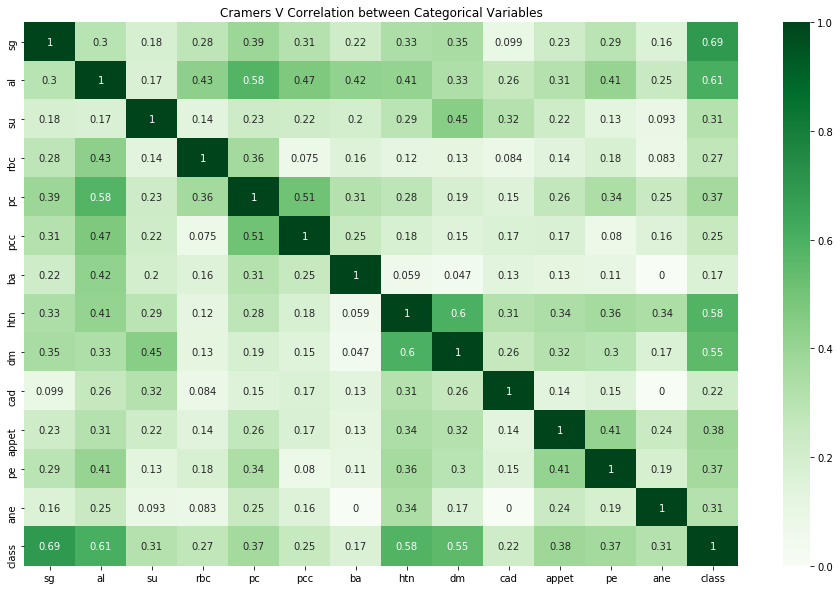

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))
ax = sb.heatmap(cramers_corr(data[non_numerical]), annot=True, ax=ax, cmap='Greens')
ax.set_title("Cramers V Correlation between Categorical Variables")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [26]:
# Select features based on high correlation with target.
nominal_selection = ['al', 'htn', 'dm']
features.extend(nominal_selection)

In [27]:
target = 'class'

In [28]:
X = data[features]
y = data[target].values

In [29]:
X = pd.get_dummies(X, columns=nominal_selection, drop_first=True)

In [30]:
features = X.columns

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=features)
X_test = pd.DataFrame(ss.transform(X_test), columns=features)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)

In [37]:
from sklearn.feature_selection import RFE

In [38]:
rfe = RFE(lr, 7)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=200,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [39]:
selected_cols = [v for i, v in enumerate(
    X_train.columns) if i in rfe.get_support(indices=True)]
X_train_rfe = X_train[selected_cols]
print('recursive feature elimination:')
print('feature ranking (1 being best):', rfe.ranking_)
print(X_train_rfe.columns)

recursive feature elimination:
feature ranking (1 being best): [1 1 1 1 3 1 2 4 1 1]
Index(['sg', 'hemo', 'rbcc', 'al_1.0', 'al_3.0', 'htn_yes', 'dm_yes'], dtype='object')


In [40]:
X_test_rfe = X_test[selected_cols]

In [41]:
lr.fit(X_train_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = lr.predict(X_test_rfe)

In [44]:
from sklearn.metrics import classification_report {0: 'notckd', 1:'ckd'}

In [59]:
print(classification_report(y_test, y_pred, output_dict=False, target_names={'notckd': 0, 'ckd': 1}))

              precision    recall  f1-score   support

      notckd       1.00      0.95      0.98        44
         ckd       0.97      1.00      0.98        56

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [43]:
lr.coef_

array([[-2.47108478, -2.33424718, -0.82122893,  1.02137761,  0.96695224,
         1.30435255,  1.2872671 ]])

In [60]:
np.exp(lr.coef_)

array([[0.08449315, 0.09688339, 0.43989073, 2.77701777, 2.62991689,
        3.68530228, 3.62287206]])

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

Having diabetes mellitus makes the odds of Chronic Kidney Disease 3.62287206 more likely.

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:
1. It is easy to understand.
2. It is easy to implement.

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, y_pred)

array([[42,  2],
       [ 0, 56]], dtype=int64)

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: It depends on the amount of medical resources available relative to the population. By optimising for specificity it is possible to save treatment for only the most severe cases, while optimizing for sensitivity allows maximizes the individual survival rate.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

Answer: Unbalanced classes may lead to model being trained on a small sample size when it comes to the minority class, leading to an ill fitted model. They are not that big of a problem in this CKD analysis.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

Answer: I would explain that unbalanced classes means we may not have enough sample data of the minority class.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [63]:
from sklearn.utils import resample

In [66]:
X_copy = X.copy()

In [67]:
X_copy['class'] = y

In [68]:
sample = X_copy[X_copy['class'] == 1].copy()

In [69]:
boot = resample(sample, replace=True, n_samples=200000, random_state=1)

In [71]:
X_copy = X_copy.append(boot)

In [72]:
X_copy.shape

(200400, 11)

In [74]:
y_copy = X_copy['class']

In [75]:
del X_copy['class']

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy)

In [77]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=features)
X_test = pd.DataFrame(ss.transform(X_test), columns=features)

In [78]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)

In [80]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
y_pred = lr.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred, output_dict=False, target_names={'notckd': 0, 'ckd': 1}))

              precision    recall  f1-score   support

      notckd       1.00      0.87      0.93        39
         ckd       1.00      1.00      1.00     50061

    accuracy                           1.00     50100
   macro avg       1.00      0.94      0.97     50100
weighted avg       1.00      1.00      1.00     50100



Unbalanced classes resulted in significantly worsening the accuracy of the model in predicting nonckd cases.

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!